# ======== 1. 로그분석 준비 ========


## A. 실습환경


1. 이 실습은 Colab (즉, Python, Jupyter Notebook)에서 작성되었습니다.
  > Jupyter Notebook 은 웹브라우저 상에서 Python 코드를 단계적으로 실행해볼 수 있는 프로그램입니다. Colab 은 브라우저 기반으로 제공되는 무료 Jupyter Notebook 사용환경 입니다.
2. 이 실습에서는 로그 분석에 필요한 파일을 Google Drive 에 업로드하고 이것을 Colab에 마운트하여 진행합니다. 즉, Google Drive 를 Colab 에 연동하여 마치 로컬 PC 처럼 활용합니다.


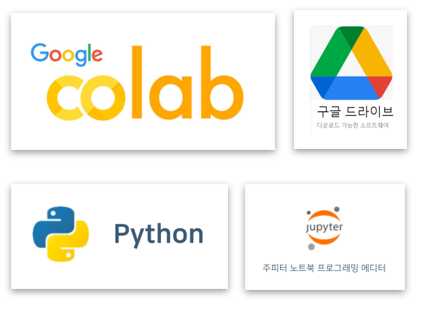

## B. 폴더생성 및 로그파일 준비



---
[준비작업 1] - 최초 1회만 준비
1. 우선, Google Drive 에 로그분석을 진행 할 폴더인 deepracer 를 생성합니다.

2. 위에서 생성한 deepracer 폴더 내에 tracks 폴더를 업로드 합니다. tracks 폴더 내에는 시뮬레이션 트랙의 waypoints 좌표가 npy 형식으로 저장되어 있습니다.  
(tracks 폴더는 https://github.com/aws-samples/aws-deepracer-workshops/tree/master/log-analysis/tracks 에서 다운받을 수 있습니다.)

3. 위에서 생성한 deepracer 폴더 내에 log_analysis 폴더를 생성합니다.  

---
[준비작업 2] - 분석할 때 마다 작업

4. log_analysis 폴더 내에 로그 분석을 진행할 모델의 폴더를 생성합니다. 이 실습에서는 model01 라는 이름의 폴더를 생성하겠습니다.

5. AWS Deepracer 콘솔창에 들어가 models 메뉴에서 로그분석을 진행할 모델을 클릭합니다. 그리고 Training 우측에 있는 Download logs 버튼을 눌러 로그 데이터를 다운받습니다.

6. 5에서 다운받은 파일을 압축을 풉니다. 압축을 풀고 sim-trace 폴더 내의 training 폴더 내의 training-simtrace 폴더를 찾습니다. training-simtrace 폴더를 4에서 생성한 로그 분석을 진행할 모델의 폴더인 model01 폴더에 업로드 합니다.  
(training-simtrace 폴더 내에는 모델이 training 하는 동안 기록 된 로그 기록들이 iteration 별로 csv 파일 형태로 저장되어있습니다.)

- 작업 공간 구조 시각화

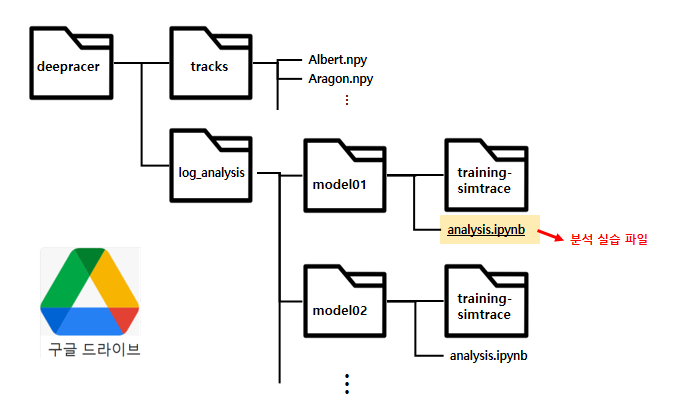

## C. 구글 드라이브 mount





- Colab 좌측에 폴더모양을 누르면 Colab의 현재 작업 폴더를 확인할 수 있습니다.
- 아래와 같이 drive.mount('drive') 코드를 실행하면 Colab 작업 공간에 구글드라이브를 연동할 수 있습니다.
- 위와 같이 코드를 실행한 후 Colab 좌측에 폴더모양을 눌러보면 'drive/MyDrive' 폴더에 구글드라이브 최상위 디렉토리가 연동되었음을 볼 수 있습니다. 

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## D. 경로 입력

**[경로 입력]**  
- root_path = '위에서 생성한 deepracer 폴더 경로'

- folder_name = 'log_analysis 폴더 내에 생성한 로그분석 폴더명'

- track_name = 'tracks 폴더 내에 있는 트랙 파일명'
> 이 실습에서는 The 2019 DeepRacer Championship Cup 트랙을 사용합니다.  
이 트랙의 파일명은 'reInvent2019_track.npy' 입니다.

In [ ]:
# deepracer 루트 경로 입력
root_path = '/content/drive/MyDrive/deepracer'

# 로그분석 폴더명 입력
folder_name = 'UUJIN-6'
folder_name2 = 'UUJIN-8'
folder_name3 = "UUJIN-8-clone"
# 트랙 파일명 입력
track_file_name = 'reInvent2019_track.npy'   # The 2019 DeepRacer Championship Cup

In [ ]:
import os

# 트랙 폴더
track_path = os.path.join(root_path, 'tracks')

# 트랙 파일
track_file_path = os.path.join(root_path, 'tracks', track_file_name)

# 로그 폴더
log_path = os.path.join(root_path, 'log_analysis', folder_name, 'training-simtrace')
log_path2 = os.path.join(root_path, 'log_analysis', folder_name2, 'training-simtrace')
log_path3 = os.path.join(root_path, 'log_analysis', folder_name3, 'training-simtrace')


print('트랙 폴더 : ', track_path)
print('트랙 파일 : ', track_file_path)
print('로그 폴더 : ', log_path)

트랙 폴더 :  /content/drive/MyDrive/deepracer/tracks
트랙 파일 :  /content/drive/MyDrive/deepracer/tracks/reInvent2019_track.npy
로그 폴더 :  /content/drive/MyDrive/deepracer/log_analysis/UUJIN-6/training-simtrace


## E. 라이브러리

- os : OS 제어
- math : 수식 계산
- pandas : 엑셀처럼 테이블 구조의 데이터 핸들링
- numpy : 수식 및 행렬 등의 고차원 수식 처리
- matplotlib : 시각화 기능

In [ ]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## F. tracks 불러오기

- Track 폴더 내 목록 보기

In [ ]:
track_list = os.listdir(track_path)
track_list.sort()
df_track_list = pd.DataFrame({'track_name' : track_list})
df_track_list

,track_name
0,AWS_track.npy
1,Albert.npy
2,AmericasGeneratedInclStart.npy
3,Aragon.npy
4,Austin.npy
5,Belille.npy
6,Bowtie_track.npy
7,Canada_Eval.npy
8,Canada_Training.npy
9,China_eval_track.npy


- 전체 Track 시각화

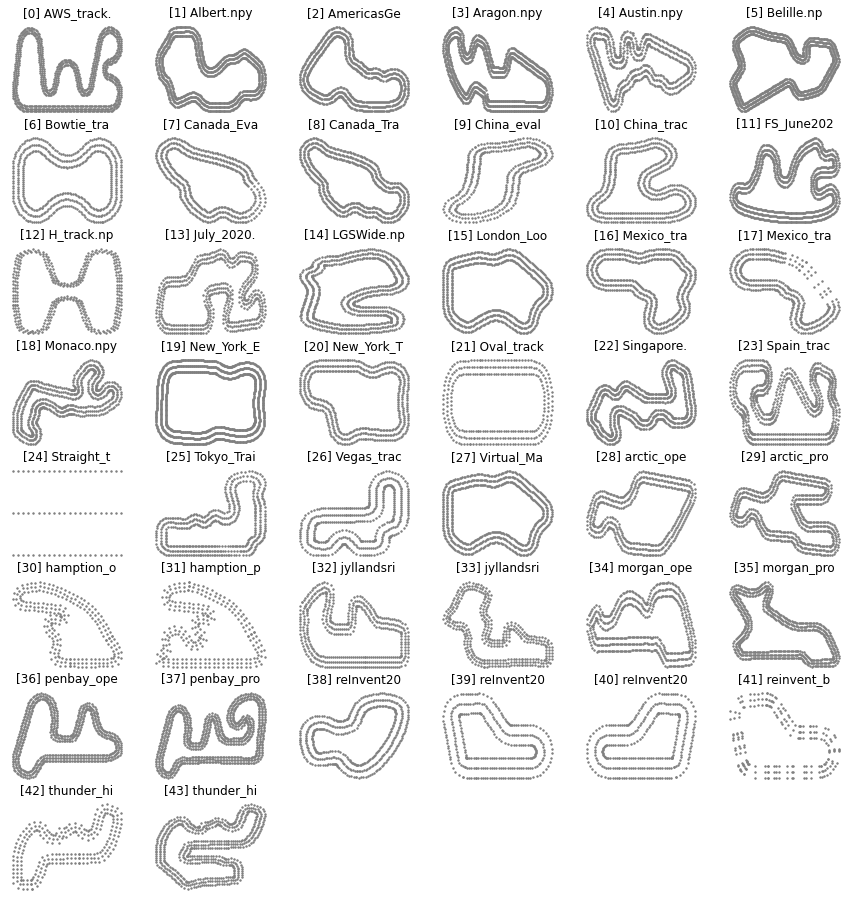

In [ ]:
track_list = sorted(os.listdir(track_path))  # 트랙 리스트 정렬
c_len = 6    # 가로 개수
r_len = math.ceil(len(track_list) / c_len)  # 세로 개수

# 시각화
plt.figure(figsize = (15,2*r_len))
for i, track in enumerate(track_list) :
    plt.subplot(r_len, c_len, i+1)
    plt.title(f"[{i}] {track[:10]}")
    plt.axis('off')
    target_arr = np.load(os.path.join(track_path, track))
    target_C = target_arr[:,[0,1]]
    target_L = target_arr[:,[2,3]]
    target_R = target_arr[:,[4,5]]

    plt.scatter(target_C[:,0],target_C[:,1], c = 'gray', s = 2)
    plt.scatter(target_L[:,0],target_L[:,1], c = 'gray', s = 2)
    plt.scatter(target_R[:,0],target_R[:,1], c = 'gray', s = 2)
    
plt.show()

- 선택한 트랙 시각화

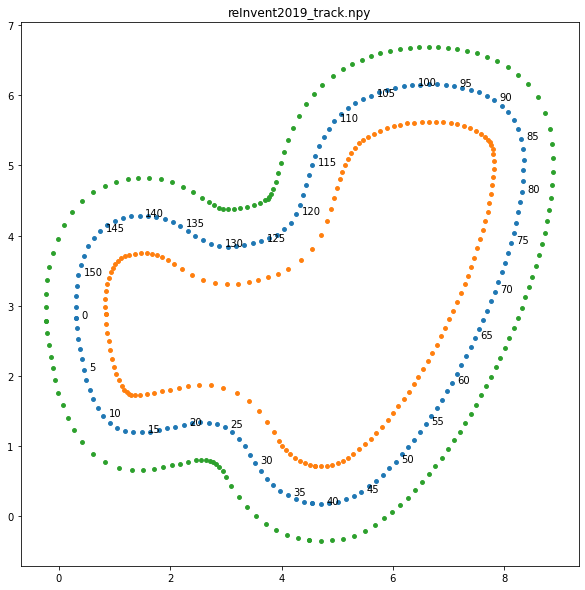

In [ ]:
# 트랙 waypoint 가져오기
track_arr = np.load(os.path.join(track_path, track_file_name))
track_C = track_arr[:,[0,1]]  # 트랙 중심 좌표
track_L = track_arr[:,[2,3]]  # 트랙 좌측 좌표
track_R = track_arr[:,[4,5]]  # 트랙 우측 좌표

# 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], s = 15)
plt.scatter(track_L[:,0],track_L[:,1], s = 15)
plt.scatter(track_R[:,0],track_R[:,1], s = 15)

# index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(track_file_name)
plt.show()

# ======== 2. 로그 분석 ========

## A. 모델 설명 및 Console 결과


**[Training 화면 구성]**
1. 용어 및 의미
- Episode 는 게임 한 판을 의미합니다. 예를들어 트랙 밖을 벗어나거나 완주를 하게 되면 한 Episode 가 끝이 납니다.

- 만약 트랙 밖을 벗어나서 Episode 가 끝이 나면 트랙 밖을 벗어난 근처 지점으로 차량을 이동하여 다시 Episode를 진행합니다.

- Iteration 은 Episode 의 집합입니다. Episode를 몇개씩 한 묶음으로 할 지는 훈련 전에 미리 지정하는 하이퍼파라미터입니다. 

- 한 Iteration 이 시작되면 차량은 다시 출발선에서 훈련을 시작합니다.

- 한 Iteration 이 끝나면 Policy 의 업데이트가 진행됩니다.

- 그리고 한 Iteration 이 끝나면 Evaluating (평가) 가 진행됩니다. Evaluating에서는 Episode 를 3번을 진행합니다.
---

2. 좌측 그래프

- Training 창의 좌측에서 훈련 과정 기록을 Graph 형태로 볼 수 있습니다. X축은 Iteration 이고  y축은 좌측(Reward의 합)과 우측(완주율) 두가지로 구성되어 있습니다.

- 초록색 그래프는 Training(훈련) 과정에서 Iteration 에 속하는 Epoisode의 Reward 합을 평균을 내어 나타낸 그래프입니다. y축은 좌측에 해당됩니다. 좌측 y축의 범위는 보상의 범위에 따라 스케일이 바뀝니다.

- 파란색과 빨간색 그래프는 각각 Training(훈련)과 Evaluating (평가) 과정에서 Iteration 에 속하는 Episode 의 완주율의 평균을 나타낸 그래프입니다. y축은 우측에 해당됩니다. 우측 y축의 범위는 항상 0에서 100 사이입니다.
---

3. 우측 및 하단

- 우측 Simulation video stream 에서 Training (훈련) 또는 Evaluating (평가) 과정을 영상으로 확인할 수 있습니다. 
- 영상은 저장되지 않으며 훈련이 끝나면 영상을 다시 볼 수 없습니다.
- 하단에는 훈련이 경과된 시간을 볼 수 있습니다.

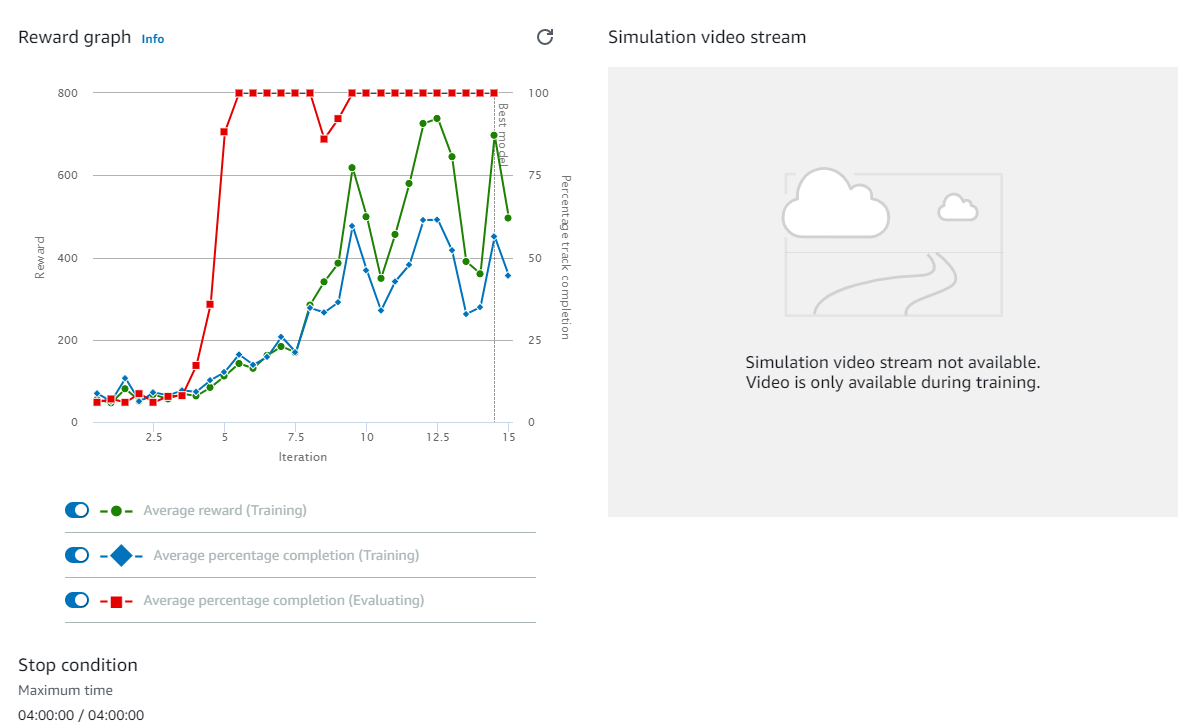

**[Reward Graph 해석]**  
- 정상적인 훈련이라면 초록, 파랑, 빨강 세 그래프는 (값은 달라도) 같은 추세를 따라야 합니다. 즉, 세 그래프가 함께 증가하거나 함께 감소하는것이 일반적입니다.
- 만약 세 그래프의 추세가 일관성이 없다면 훈련 과정이 정상적이라고 볼 수 없습니다. 즉, 하이퍼파라미터 또는 보상 함수등을 수정해야 합니다.
- 만약 세 그래프가 상승 추세에서 훈련이 끝났다면 훈련시간을 늘려 볼 필요가 있습니다.
- 만약 파랑 또는 빨강 그래프가 일찍 100에 도달하였다면 매우 빠르게 학습이 진행된 것입니다. 하지만 이 그래프는 완주율과 보상만 표시하므로 속도에 대한 정보는 해석하기 어렵습니다. 
- 완주율이 100에 도달하지 못한 채로 세 그래프가 더이상 상승을 하지 않는다면 훈련이 잘 되었다고 볼 수 없습니다. 완주율 100에 도달하지 못한채 사실상 학습에 진전이 없는 것이기 때문입니다.
- 강화학습은 일반적으로 불안정하기 마련입니다. 따라서 그래프가 진동하는 것이 일반적이지만 이것이 지나치다면 탐험율 또는 학습율 등의 하이퍼파라미터를 조정해 볼 필요가 있습니다.


> Reward Graph에  대한 개인적인 해석



---



하이퍼파라미터와 보상함수로 여러 모델을 돌려보았는데,

그 중 가장 안정적으로 Evaluating 그래프가 100을 유지했다.

4시간이라는 오랜 시간동안 크게 떨어지지 않고 100이 유지된 것을 확인하고, 안정성은 충분히 유지되었으리라 판단했다.

그래서 이 모델을 기반으로 clone을 생성하고자 한다.

**[Evaluation 화면 구성]**

- 훈련이 끝난 후 최종 평가를 진행하는 곳입니다.

- 3번의 episode 를 진행하며 episode 가 끝나면 다시 출발선에서 부터 다음 episode 가 시작됩니다.

- Training 창에서와 달리 완주 시간에 대한 정보를 볼 수 있습니다. 따라서 속도 및 시간에 대한 정보를 얻고자 한다면 Training 이 아닌 Evaluation 창을 활용해야 합니다.

- Training 창에서와 마찬가지로 Evaluation 에서도 영상을 볼 수 있습니다.


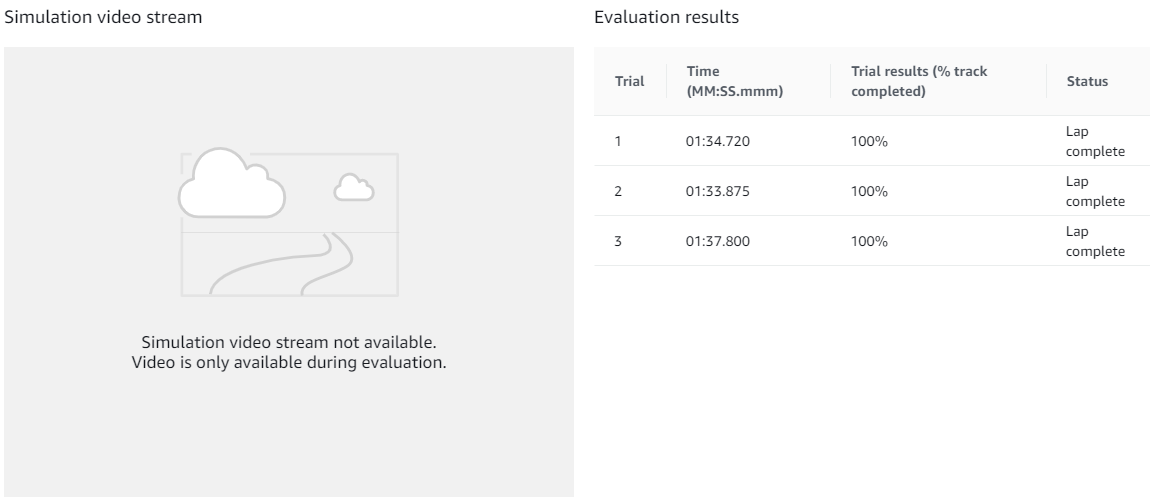

**[Training configuration]**
- 하이퍼파라미터, 에이전트 및 환경 등에 대한 정보를 볼 수 있습니다.

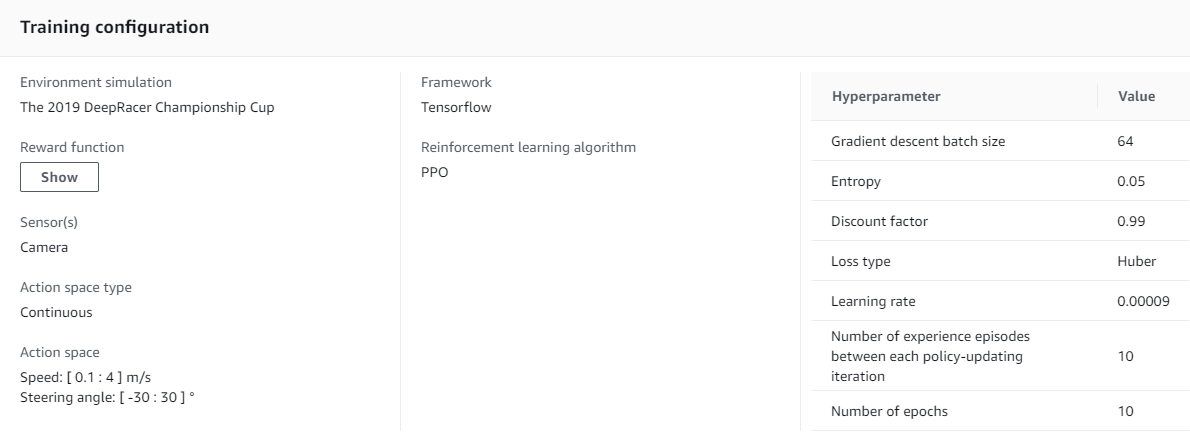

**[Reward Function]**

In [ ]:
import math


def dist(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5


# thanks to https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates
def rect(r, theta):
    """
    theta in degrees
    returns tuple; (float, float); (x,y)
    """

    x = r * math.cos(math.radians(theta))
    y = r * math.sin(math.radians(theta))
    return x, y


# thanks to https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates
def polar(x, y):
    """
    returns r, theta(degrees)
    """

    r = (x ** 2 + y ** 2) ** .5
    theta = math.degrees(math.atan2(y,x))
    return r, theta


def angle_mod_360(angle):
    """
    Maps an angle to the interval -180, +180.
    Examples:
    angle_mod_360(362) == 2
    angle_mod_360(270) == -90
    :param angle: angle in degree
    :return: angle in degree. Between -180 and +180
    """

    n = math.floor(angle/360.0)

    angle_between_0_and_360 = angle - n*360.0

    if angle_between_0_and_360 <= 180.0:
        return angle_between_0_and_360
    else:
        return angle_between_0_and_360 - 360


def get_waypoints_ordered_in_driving_direction(params):
    # waypoints are always provided in counter clock wise order
    if params['is_reversed']: # driving clock wise.
        return list(reversed(params['waypoints']))
    else: # driving counter clock wise.
        return params['waypoints']


def up_sample(waypoints, factor):
    """
    Adds extra waypoints in between provided waypoints
    :param waypoints:
    :param factor: integer. E.g. 3 means that the resulting list has 3 times as many points.
    :return:
    """
    p = waypoints
    n = len(p)

    return [[i / factor * p[(j+1) % n][0] + (1 - i / factor) * p[j][0],
             i / factor * p[(j+1) % n][1] + (1 - i / factor) * p[j][1]] for j in range(n) for i in range(factor)]


def get_target_point(params):
    waypoints = up_sample(get_waypoints_ordered_in_driving_direction(params), 20)

    car = [params['x'], params['y']]

    distances = [dist(p, car) for p in waypoints]
    min_dist = min(distances)
    i_closest = distances.index(min_dist)

    n = len(waypoints)

    waypoints_starting_with_closest = [waypoints[(i+i_closest) % n] for i in range(n)]

    r = params['track_width'] * 0.9

    is_inside = [dist(p, car) < r for p in waypoints_starting_with_closest]
    i_first_outside = is_inside.index(False)

    if i_first_outside < 0:  # this can only happen if we choose r as big as the entire track
        return waypoints[i_closest]

    return waypoints_starting_with_closest[i_first_outside]


def get_target_steering_degree(params):
    tx, ty = get_target_point(params)
    car_x = params['x']
    car_y = params['y']
    dx = tx-car_x
    dy = ty-car_y
    heading = params['heading']

    _, target_angle = polar(dx, dy)

    steering_angle = target_angle - heading

    return angle_mod_360(steering_angle)


def score_steer_to_point_ahead(params):
    best_stearing_angle = get_target_steering_degree(params)
    steering_angle = params['steering_angle']

    error = (steering_angle - best_stearing_angle) / 60.0  # 60 degree is already really bad

    score = 1.0 - abs(error)

    return max(score, 0.01)  # optimizer is rumored to struggle with negative numbers and numbers too close to zero


def get_test_params():
    return {
        'x': 0.7,
        'y': 1.05,
        'heading': 160.0,
        'track_width': 0.45,
        'is_reversed': False,
        'steering_angle': 0.0,
        'waypoints': [
            [0.75, -0.7],
            [1.0, 0.0],
            [0.7, 0.52],
            [0.58, 0.7],
            [0.48, 0.8],
            [0.15, 0.95],
            [-0.1, 1.0],
            [-0.7, 0.75],
            [-0.9, 0.25],
            [-0.9, -0.55],
        ]
    }


def test_reward():
    params = get_test_params()

    reward = reward_function(params)

    print("test_reward: {}".format(reward))

    assert reward > 0.0


def test_get_target_point():
    result = get_target_point(get_test_params())
    expected = [0.33, 0.86]
    eps = 0.1

    print("get_target_point: x={}, y={}".format(result[0], result[1]))

    assert dist(result, expected) < eps


def test_get_target_steering():
    result = get_target_steering_degree(get_test_params())
    expected = 46
    eps = 1.0

    print("get_target_steering={}".format(result))

    assert abs(result - expected) < eps


def test_angle_mod_360():
    eps = 0.001

    assert abs(-90 - angle_mod_360(270.0)) < eps
    assert abs(-179 - angle_mod_360(181)) < eps
    assert abs(0.01 - angle_mod_360(360.01)) < eps
    assert abs(5 - angle_mod_360(365.0)) < eps
    assert abs(-2 - angle_mod_360(-722)) < eps

def test_upsample():
    params = get_test_params()
    print(repr(up_sample(params['waypoints'], 2)))

def test_score_steer_to_point_ahead():
    params_l_45 = {**get_test_params(), 'steering_angle': +45}
    params_l_15 = {**get_test_params(), 'steering_angle': +15}
    params_0 = {**get_test_params(), 'steering_angle': 0.0}
    params_r_15 = {**get_test_params(), 'steering_angle': -15}
    params_r_45 = {**get_test_params(), 'steering_angle': -45}

    sc = score_steer_to_point_ahead

    # 0.828, 0.328, 0.078, 0.01, 0.01
    print("Scores: {}, {}, {}, {}, {}".format(sc(params_l_45), sc(params_l_15), sc(params_0), sc(params_r_15), sc(params_r_45)))


def run_tests():
    test_angle_mod_360()
    test_reward()
    test_upsample()
    test_get_target_point()
    test_get_target_steering()
    test_score_steer_to_point_ahead()

    print("All tests successful")


# run_tests()


####### default ########

def reward_function(params):
    '''
    Example of rewarding the agent to follow center line
    '''
    ## reward 1 ##
    all_wheels_on_track = params['all_wheels_on_track']
    
    if all_wheels_on_track :
        reward1 = 1
    else :
        reward1 = 0.01
        
    
    ## reward 2 ##
    speed = params['speed']
    
    if speed >= 3 :
        reward2 = 0.6
    elif speed >= 2 :
        reward2 = 0.35
    elif speed >= 1 :
        reward2 = 0.275
    else :
        reward2 = 0.15
        
    ## reward 3 ##

    reward3 = float(score_steer_to_point_ahead(params))
        
    ## reward 4 ##
    abs_steering = abs(params['steering_angle'])
    
    if abs_steering < 8 :
        reward4 = 0.3
    elif abs_steering < 20 :
        reward4 = 0.2
    else :
        reward4 = 0.1
        
    
    ## reward 5 ##
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']
    
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]
    
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
    track_direction = math.degrees(track_direction)
    
    direction_diff = abs(track_direction - heading)
    if direction_diff > 180 :
        direction_diff = 360 - direction_diff
        
    if direction_diff < 5 :
        reward5 = 0.3
    elif direction_diff < 30 :
        reward5 = 0.2
    else :
        reward5= 0.1
        
    ## final reward ##
    reward = reward1 + reward2 + reward3 + reward4 + reward5
    
    return float(reward)




> Reward Function 해석

---


- reward 1 

 : 'all_wheels_are_on_track' 파라미터를 사용하여 바퀴가 트랙 안에서 이탈하지 않으면 보상을 준다.
- reward 2 

 : speed 가 빠를수록 더 큰 보상을 준다
- reward 3 

 : 기존에 'distance_from_the_center' 파라미터를 통해 트랙 가운데로의 거리가 가까울 수록 보상을 많이 주도록 했던 함수를 없앴다.

 : 'waypoints' 파라미터를 사용하여, 자동차를 기준으로 트랙 지름의 2배가 되는 원을 그린다. 해당 원의 진행방향 쪽 waypoint 와 맞닿는 지점과 현재 지점을 이었을 때 예상되는 방향으로 올바르게 진행할 때, 많은 보상을 주는 함수로 바꾸었다.
- reward 4

 : 바퀴를 꺾는 각도를 절대값으로 계산하여, 적게 꺾을수록 많은 보상을 준다.
- reward 5

 : 차량과 가장 근접한 waypoint 까지의 방향을 계산하여 실제 주행하는 방향과의 각도 차이가 적게 날수록 많은 보상을 준다.
- 위에서 설명한 reward 1 ~ 5 를 합산한 reward 값을 return 한다.

### A2. video stream 에서 보인 특징

- 훈련 또는 평가하는 장면을 video stream 으로 볼 수 있습니다.



---


1. 구불구불한 길에서 오히려 속도를 낸다.

 - 구불구불한 길에서 속도를 내면서 이를 주체하지 못하고 굽은 길 마지막 부분에서 이탈하는 경우가 많다. 
2. 학습 시간이 길어질수록 이탈하는 횟수는 줄어든다.
3. 이탈하지 않으려고 할수록 속도가 많이 느려진다.

### A3. 모델의 특징 및 차별성

- 이 부분은 여러분이 만든 모델의 차별성을 설명하는 섹션입니다.



---

1. 앞으로 발전시켜 나갈 모델들의 베이스 모델을 만들고자 안정성에 큰 중점을 두었다.
2. 안정성을 추구하기위해 속도의 제한은 거의 두지 않았다. (0.1 ~ 4 까지 넓은 범위 허용)
3. 예상 방향을 따라가는 것에 큰 의미를 두었다. 따라서 waypoint를 이용하여 예상 방향으로 갈 때 보상을 주도록하는 함수가 주가 된다.

## B. 로그 파일 불러오기

- 경로 내 파일 목록 보기

In [ ]:
# 폴더 내에 로그 파일 목록 가져오기
file_names = os.listdir(log_path)

# 데이터 프레임으로 변형
df_file_name = pd.DataFrame()
df_file_name['file_name'] = file_names

# 정렬
df_file_name['iter'] = pd.Series(file_names).apply(lambda x : x.split('-')[0]).astype('int')
df_file_name = df_file_name.sort_values(by='iter').reset_index(drop = True)

print(df_file_name)

           file_name  iter
0    0-iteration.csv     0
1    1-iteration.csv     1
2    2-iteration.csv     2
3    3-iteration.csv     3
4    4-iteration.csv     4
5    5-iteration.csv     5
6    6-iteration.csv     6
7    7-iteration.csv     7
8    8-iteration.csv     8
9    9-iteration.csv     9
10  10-iteration.csv    10
11  11-iteration.csv    11
12  12-iteration.csv    12
13  13-iteration.csv    13
14  14-iteration.csv    14
15  15-iteration.csv    15
16  16-iteration.csv    16
17  17-iteration.csv    17
18  18-iteration.csv    18
19  19-iteration.csv    19
20  20-iteration.csv    20
21  21-iteration.csv    21
22  22-iteration.csv    22
23  23-iteration.csv    23
24  24-iteration.csv    24
25  25-iteration.csv    25
26  26-iteration.csv    26
27  27-iteration.csv    27
28  28-iteration.csv    28


- 로그 파일 불러오기

In [ ]:
# 데이터 테이블로 정리하기
data_list = []
df_data = pd.DataFrame()
for i, file_name in enumerate(df_file_name['file_name']) :
    f = open(os.path.join(log_path, file_name), mode = 'r')
    text = f.read()
    f.close()

    # action 이 리스트형으로 되어 있는 경우 콤마(,)가 포함되어 있어서 제대로 읽어오지 못함. 이것을 전처리
    if '[' in text :
        text = text.replace('[','')
        text = text.replace(']','')
        text = text.replace('action', 'action_1,action_2')

    # dataframe 으로 변환
    text_lines = text.split('\n')
    text_list = [text_line.split(',') for text_line in text_lines]
    df = pd.DataFrame(text_list[1:], columns = text_list[0])
    df.dropna(inplace = True)

    # 자료형 변환
    float_col = df.columns[~ df.columns.isin(['episode_status', 'done',	'all_wheels_on_track'])]
    int_col = ['episode', 'steps', 'closest_waypoint']
    bool_col = ['done',	'all_wheels_on_track']
    df[float_col] = df[float_col].astype('float')
    df[int_col] = df[int_col].astype('int')
    df[bool_col] = df[bool_col].astype('bool')

    # iteration 행 삽입
    new_col = df.columns.insert(0,'iteration')
    df['iteration'] = i
    df = df[new_col]

    # 마무리
    data_list.append(df)
    df_data = df_data.append(df)

# 인덱스 정리
df_data.reset_index(inplace = True, drop = True)

df_data

,iteration,episode,steps,X,Y,yaw,steer,throttle,action_1,action_2,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1,0.322517,2.691224,-84.003747,6.641993,1.001848,6.641993,1.001848,0.000000,True,True,0.606234,1,23.118222,20.835,prepare,0.0
1,0,0,2,0.322497,2.691373,-84.006075,20.365031,4.000000,20.365031,4.000000,2.812997,True,True,0.605583,1,23.118222,20.893,in_progress,0.0
2,0,0,3,0.320987,2.683226,-84.509070,-21.242024,0.100000,-21.242024,0.100000,2.030037,True,True,0.639948,1,23.118222,20.961,in_progress,0.0
3,0,0,4,0.321400,2.673948,-84.707827,18.781567,3.966274,18.781567,3.966274,2.959817,True,True,0.679566,1,23.118222,21.036,in_progress,0.0
4,0,0,5,0.321670,2.656517,-84.968790,13.739171,4.000000,13.739171,4.000000,3.055669,True,True,0.754378,1,23.118222,21.102,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,28,289,233,3.546821,4.495979,179.933670,-6.365601,4.000000,-6.365601,4.000000,1.320954,True,True,35.696555,124,23.118222,8926.397,in_progress,0.0
38995,28,289,234,3.465919,4.504535,178.017403,21.647851,2.517796,21.647851,2.517796,1.318388,True,True,36.168676,125,23.118222,8926.443,in_progress,0.0
38996,28,289,235,3.373857,4.509326,177.532791,-11.260425,0.100000,-11.260425,0.100000,0.708552,True,True,36.552790,126,23.118222,8926.521,in_progress,0.0
38997,28,289,236,3.281742,4.518115,176.033874,-30.000000,0.100000,-30.000000,0.100000,0.470000,True,True,37.060937,127,23.118222,8926.592,in_progress,0.0


**[주요 변수 설명]**
- iteration : episode의 집합.
- episode : step 의 집합
- step : episode 의 순서
- X : 차량의 x좌표
- Y : 차량의 y좌표
- yaw : 차량의 정면 각도 ( = heading)
- steer : 차량 핸들 각도
- throttle : 차량 속도 ( = speed)
- action : 행동  
> 이산공간의 경우 행동의 index 가 표시되고 연속공간의 경우 차량의 핸들 각도와 속도가 각각 action_1, action_2 로 나누어 표시됨
- reward : 현재 step 에서 받은 보상
- all_wheels_on_track : 차량의 네 바퀴가 트랙 안에 위치하는지 여부
- progress : 현재 Epiosde 에서 완주율
- closest_waypoint : 가장 가까운 waypoint
- tstamp : 훈련이 진행된 총 시간

## C. episode 분석

- 데이터 그룹화

In [ ]:
# 에피소드 별로 데이터를 그룹화
df_groupby_episode = df_data.groupby('episode')

### C1. episode vs 완주율

**[episode 에 따른 완주율]**
- 에피소드가 진행됨에 따라 완주율이 높아지는 것이 좋습니다.
- s 자 형태로 완주율 최대치에 도달하는 것이 가장 이상적이라 볼 수 있습니다.

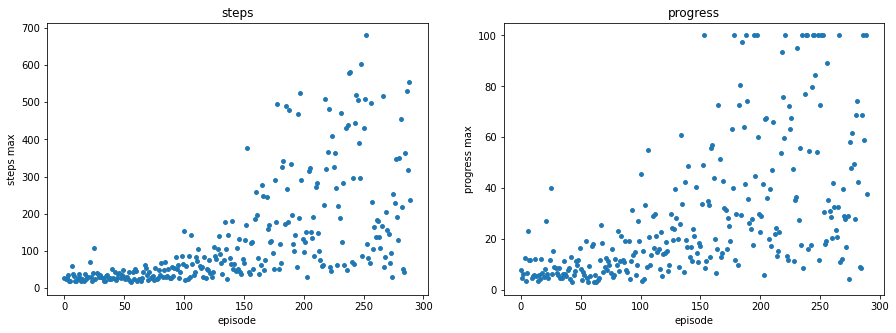

In [ ]:
# 시각화
plt.figure(figsize = (15,5))

# step 계산
step_max = df_groupby_episode.max()['steps']

# step 시각화
plt.subplot(1,2,1)
plt.scatter(x = step_max.index, y = step_max, s = 15)
plt.title('steps')
plt.xlabel('episode')
plt.ylabel('steps max')

# progress 계산
progress_max = df_groupby_episode.max()['progress']

# progress 시각화
plt.subplot(1,2,2)
plt.scatter(x = progress_max.index, y = progress_max, s = 15)
plt.title('progress')
plt.xlabel('episode')
plt.ylabel('progress max')

plt.show()

### C2. episode vs reward

**[episode 에 따른 보상의 합]**
- 에피소드가 진행됨에 따라 보상의 합이 높아지는 것이 좋습니다.
- 완주율과 함께 S 자 형태로 수렴하는 것이 이상적이라 볼 수 있습니다.

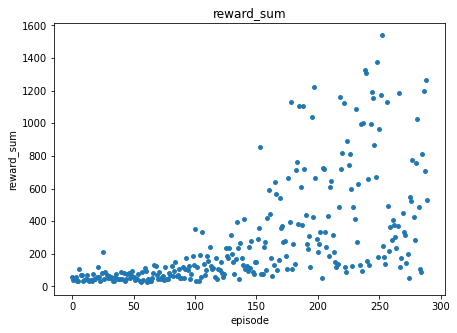

In [ ]:
# reward_sum 계산
reward_sum = df_groupby_episode.sum()['reward']

# 시각화
plt.figure(figsize = (7,5))
plt.scatter(x = reward_sum.index, y = reward_sum, s = 15)
plt.title('reward_sum')
plt.xlabel('episode')
plt.ylabel('reward_sum')
plt.show()

## D. reward 기능 분석

### D1. 속도

**[속도에 따른 보상의 분포]**
- 속도가 높아질 수록 보상도 함께 증가하는 것이 이상적이라 볼 수 있습니다.
- 즉, / (슬래시) 형태의 증가하는 형태의 분포가 이상적입니다.

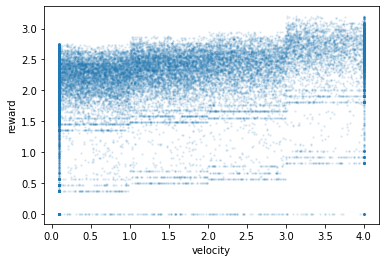

In [ ]:
# 시각화
plt.scatter(x = df_data['throttle'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('velocity')
plt.ylabel('reward')
plt.show()

### D2. 조향

**[핸들 각도에 따른 보상의 분포]**
- 핸들 각도가 0에 가까울 수록 (즉, 정면을 바라볼 수록) 보상이 높아지는 것이 이상적이라 볼 수 있습니다.
- 즉 ㅅ(시옷) 형태의 분포가 이상적입니다.

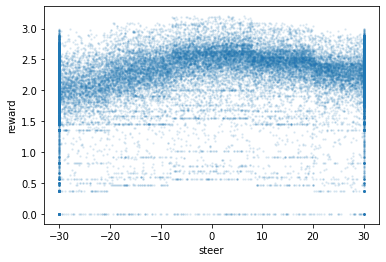

In [ ]:
# 시각화
plt.scatter(x = df_data['steer'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('steer')
plt.ylabel('reward')
plt.show()

### D3. distance_from_center

**[중심으로부터 거리에 따른 보상의 분포]**
- 중심으로부터 거리가 0에 가까울 수록 보상이 높아지는 것이 이상적이라 볼 수 있습니다.
- 즉, 감소하는 형태의 그래프가 이상적입니다.

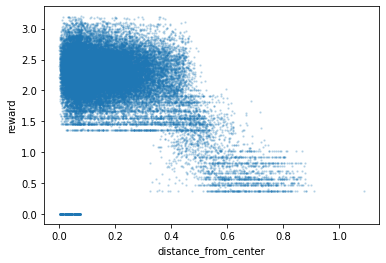

In [ ]:
# waypoint 중심 좌표 가져오기
x_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,0])
y_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,1])

# 중심으로 부터의 거리 계산
distance_from_center = ((df_data['X'] - x_center)**2 + (df_data['Y'] - y_center)**2)**(1/2)

# 시각화
plt.scatter(distance_from_center, df_data['reward'], alpha = 0.2, s = 2)
plt.xlabel('distance_from_center')
plt.ylabel('reward')
plt.show()

## E. 분포 조사

### E1. 행동 분포

- 종 모양 또는 고르게 분포하는 경우가 이상적입니다.

Text(0.5, 1.0, 'throttle')

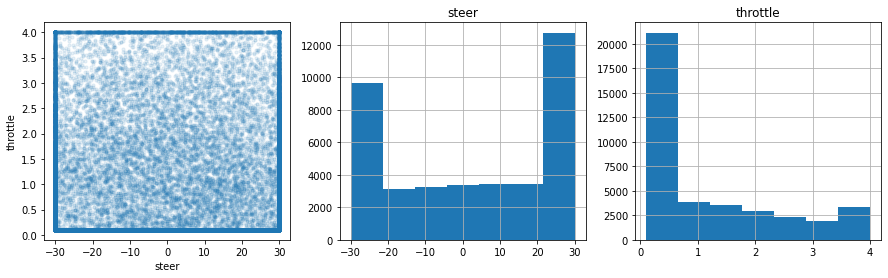

In [ ]:
# 이미지 크기 지정
plt.figure(figsize = (15,4))

# 행동 분포 scatter
plt.subplot(1,3,1)
plt.scatter(x = df_data['steer'], y = df_data['throttle'], alpha = 0.1, s = 10)
plt.xlabel('steer')
plt.ylabel('throttle')

# 핸들 행동 histogram
plt.subplot(1,3,2)
df_data['steer'].hist(bins = 7)
plt.title('steer')

# 속도 행동 histogram
plt.subplot(1,3,3)
df_data['throttle'].hist(bins = 7)
plt.title('throttle')

### E2. reward 분포

- reward 분포는 종 모양을 띄는 것이 이상적입니다.

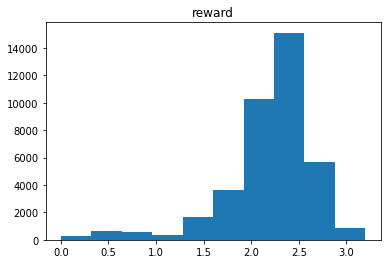

In [ ]:
# 시각화
plt.hist(df_data['reward'], bins = 10)  # 10개 구간
plt.title('reward')
plt.show()

## F. 자취 시각화

### F1. 위치

**[자취 분포 시각화]**

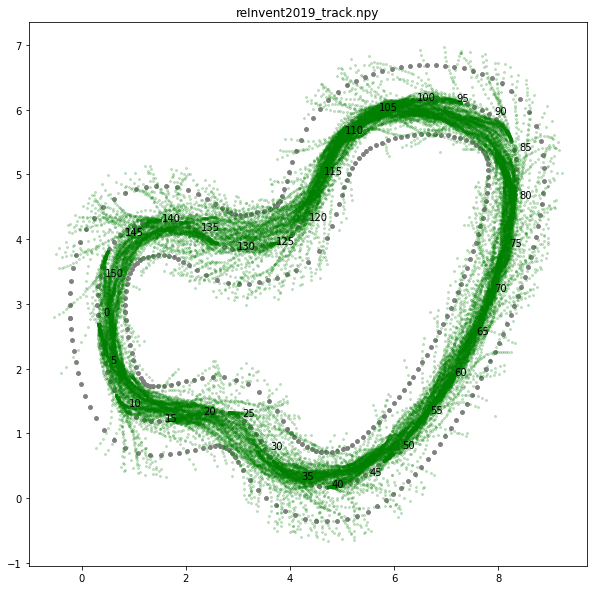

In [ ]:
# 트랙 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 로그 자취 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = 'green', s = 4, alpha = 0.2)

# 출력
plt.title(track_file_name)
plt.show()

### F2. 속도

**[속도 분포 시각화]**

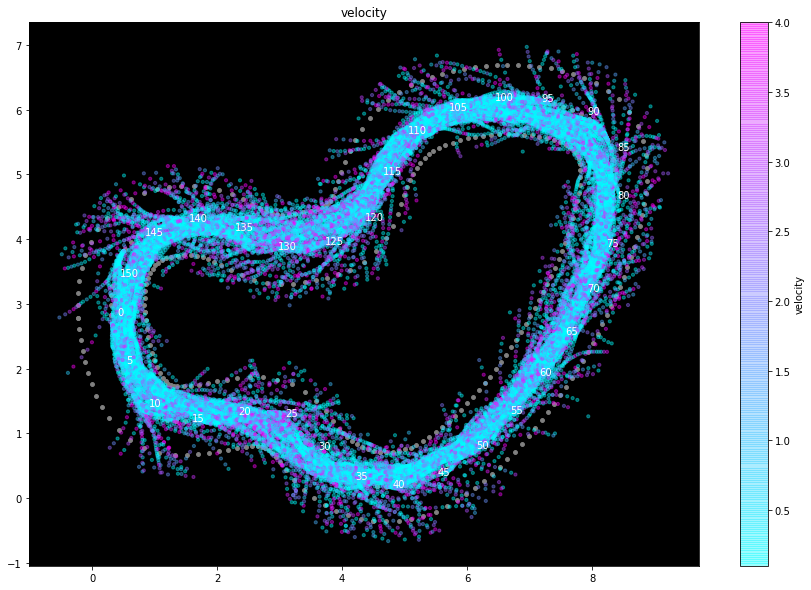

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

### F3. reward

**[reward 분포 시각화]**

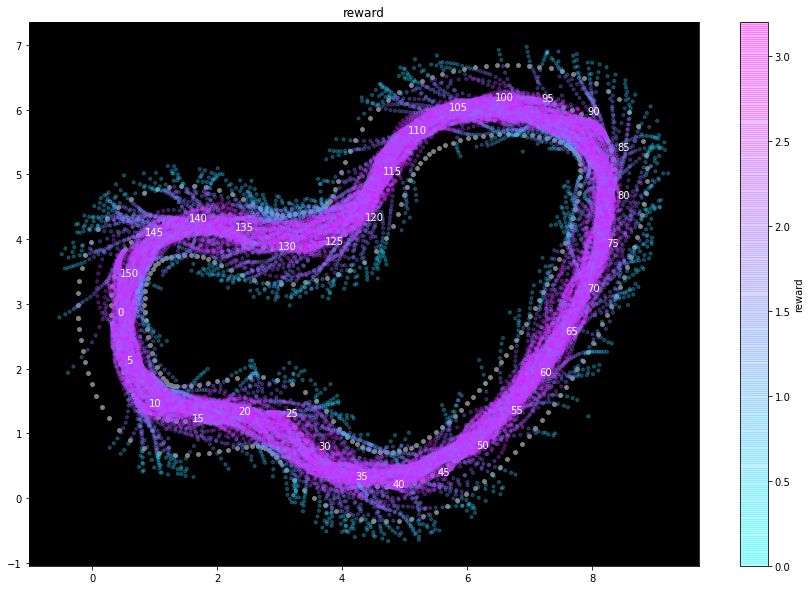

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 reward에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['reward'], s = 10, alpha = 0.3, cmap = plt.cm.cool)
plt.colorbar(label='reward')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('reward')
plt.gca().set_facecolor('black') # 배경색
plt.show()

### F4. 위험 구간

- 에피소드별 마지막 waypoint

In [ ]:
df_last_waypoint = df_data[['episode', 'closest_waypoint']].copy()
df_last_waypoint = df_last_waypoint[::-1]
df_last_waypoint = df_last_waypoint.drop_duplicates(subset = 'episode')
df_last_waypoint = df_last_waypoint.rename({'closest_waypoint':'last_waypoint'}, axis = 1)
df_last_waypoint = df_last_waypoint.reset_index(drop = True)
df_last_waypoint

,episode,last_waypoint
0,289,127
1,288,62
2,287,145
3,286,47
4,285,144
...,...,...
285,4,36
286,3,43
287,2,25
288,1,15


- 마지막 waypoint 개수

In [ ]:
df_dangerous = df_last_waypoint['last_waypoint'].value_counts()[::-1]
df_dangerous = df_dangerous.reset_index(name = 'count')
df_dangerous = df_dangerous.rename({'index':'waypoint'}, axis = 1)
df_dangerous

,waypoint,count
0,0,1
1,112,1
2,76,1
3,102,1
4,45,1
...,...,...
120,15,5
121,35,5
122,36,5
123,145,6


**[위험 구간 시각화]**

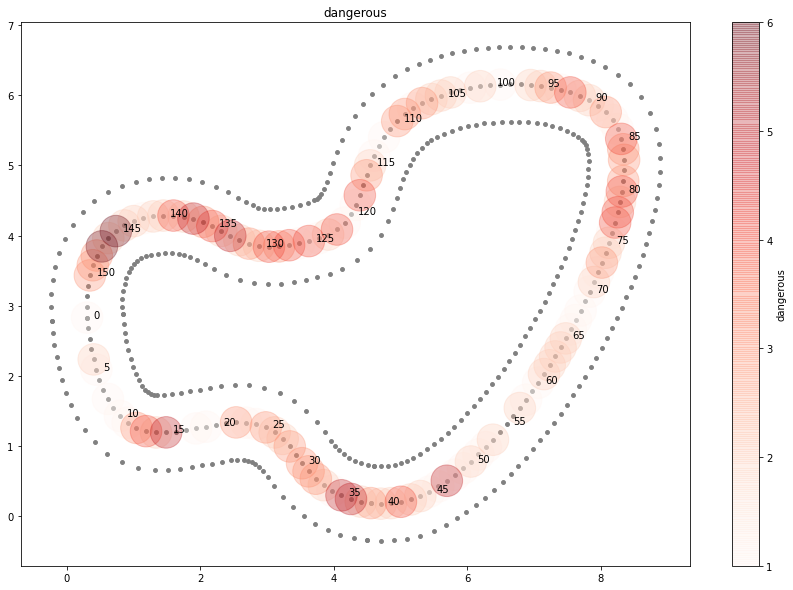

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 위험 (이탈) 구간 좌표 가져오기
x_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][0])
y_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][1])

# 위험 (이탈) 구간을 이탈한 정도에 따라 색깔을 다르게 시각화
plt.scatter(x = x_dan, y = y_dan,  c = df_dangerous['count'], s = 1000, alpha = 0.3, cmap = plt.cm.Reds)
plt.colorbar(label='dangerous')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title('dangerous')
plt.show()

#### F4-1. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

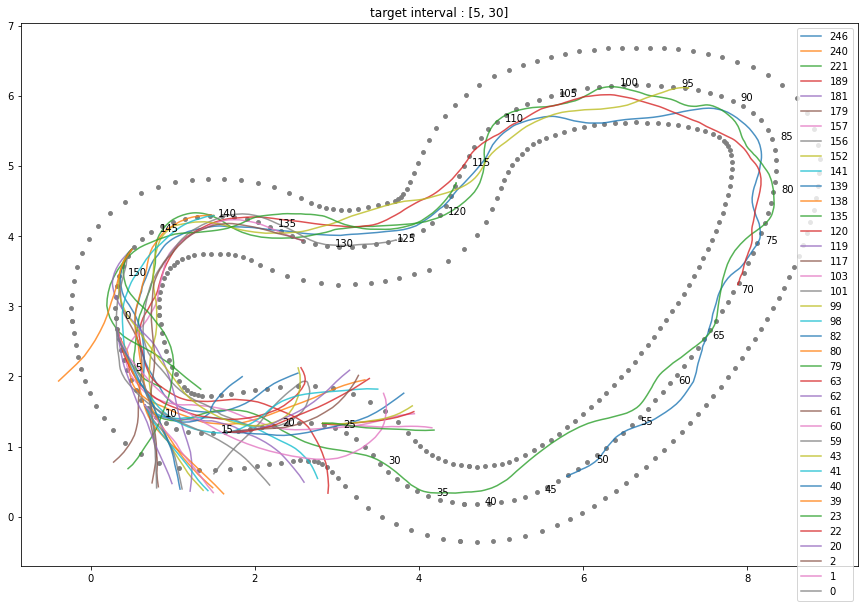

In [ ]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [5, 30]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()

#### F4-2. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

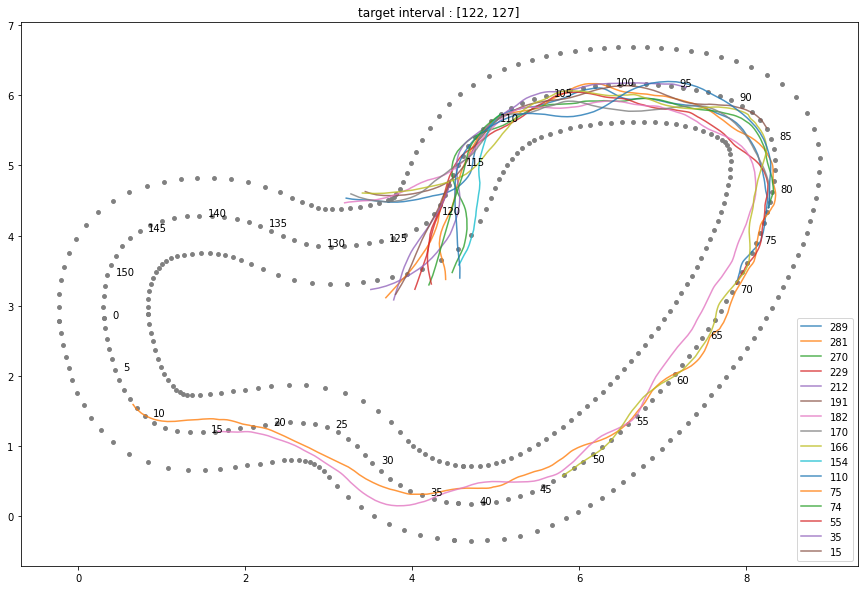

In [ ]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [122, 127]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()

# ======== 3. 분석 및 튜닝 ========

## A. 결과 분석

- 위에서 수행한 분석 내용을 토대로 본인의 분석 및 해석을 적는 섹션입니다.


---

1. 완전한 커브가 아닌, 약간의 굽은 길이 연속되는 구간에서 직진에 가까운 구간보다 더 빠른 속도를 낸다. 여기서 이탈하지 않도록 학습시키는 것이 중요할 것 같다.

2. 안정성을 추구하기 위한 코드를 짜고, 이를 바탕으로 오랜 시간 학습을 하니, 안정성 확보에는 성공했지만 속도가 너무 느리다. 속도를 높힐 방법을 찾는 과정이 필수적으로 필요하다.

3. 평가치가 100%를 연속적으로 찍는 것을 보아 평가 시간은 충분했다고 판단된다. 오히려 시간이 갈수록 속도가 느려지는 것을 통해 과잉 학습이 된 것 아닌가 하는 생각이 든다. 학습시간을 조금 줄여도 될 것 같다.

4. 불필요한 행동이 많아보인다. 탐험을 줄이고 학습율을 높여볼 필요가 있다.
  
기타 등등..

## B. 튜닝 계획

- 위에서 결과 분석을 토대로 튜닝 계획을 적는 섹션입니다.
- 아래에 튜닝 계획을 적고 새로운 모델에 적용해보세요.

### B1. 하이퍼파라미터 튜닝



---

1. entropy : 0.05 에서 0.03 로 수정

2. 훈련시간 : 4시간에서 1시간으로 수정

3. 최저 속도 : 0.1m/s 에서 0.8m/s 로 수정

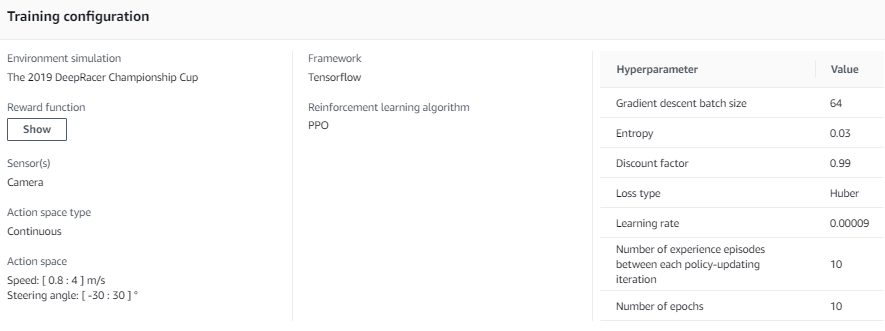

### B2. 보상 함수 튜닝 



---

1. 속도에 따른 보상의 차이를 속도에 따라 더 크게 바꿈.

In [ ]:
    ## reward 2 ##
    speed = params['speed']
    
    if speed >= 3 :
        reward2 = 0.7
    elif speed >= 2 :
        reward2 = 0.4
    elif speed >= 1 :
        reward2 = 0.3
    else :
        reward2 = 0.15

## C. 튜닝한 새 모델 로그 간략 분석

### C1. 1차 업그레이드 모델 : UUJIN - 8


> 앞서 분석한 UUJIN - 6 모델 데이터를 기반으로 일부 데이터 수정 후 새로 학습하여 만든 모델이다.



In [ ]:
file_names2 = os.listdir(log_path2)

df_file_name2 = pd.DataFrame()
df_file_name2['file_names2'] = file_names2

df_file_name2['iter2'] = pd.Series(file_names2).apply(lambda x : x.split('-')[0]).astype('int')
df_file_name2 = df_file_name2.sort_values(by='iter2').reset_index(drop = True)



data_list2 = []
df_data2 = pd.DataFrame()
for i, file_names2 in enumerate(df_file_name2['file_names2']) : 
  f2 = open(os.path.join(log_path2, file_names2), mode = 'r') 
  text2 = f2.read()
  f2.close()

  if '[' in text2 :
    text2 = text2.replace('[', '')
    text2 = text2.replace(']','')
    text2 = text2.replace('action', 'action_1, action2')

  text_lines2 = text2.split("\n")
  text_list2 = [text_line2.split(',') for text_line2 in text_lines2]

  df2 = pd.DataFrame(text_list2[1:], columns = text_list2[0])
  df2.dropna(inplace = True)

  float_col2 = df2.columns[~ df2.columns.isin(['episode_status', 'done',	'all_wheels_on_track'])]
  int_col2 = ['episode', 'steps', 'closest_waypoint']
  bool_col2 = ['done',	'all_wheels_on_track']
  df2[float_col2] = df2[float_col2].astype('float')
  df2[int_col2] = df2[int_col2].astype('int')
  df2[bool_col2] = df2[bool_col2].astype('bool')

    # iteration 행 삽입
  new_col2 = df2.columns.insert(0,'iteration')
  df2['iteration'] = i
  df2 = df2[new_col2]

    # 마무리
  data_list2.append(df2)
  df_data2 = df_data2.append(df2)

# 인덱스 정리
df_data2.reset_index(inplace = True, drop = True)

df_data2  

,iteration,episode,steps,X,Y,yaw,steer,throttle,action_1,action2,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1,0.322520,2.691224,-84.004645,-30.000000,1.433822,-30.000000,1.433822,0.000000,True,True,0.606235,1,23.118222,21.085,prepare,0.0
1,0,0,2,0.322497,2.691373,-84.006075,11.573773,2.639970,11.573773,2.639970,2.859518,True,True,0.605583,1,23.118222,21.166,in_progress,0.0
2,0,0,3,0.321256,2.681723,-84.523515,-16.048182,1.538416,-16.048182,1.538416,2.366222,True,True,0.646535,1,23.118222,21.234,in_progress,0.0
3,0,0,4,0.322583,2.655388,-84.808534,-30.000000,1.208658,-30.000000,1.208658,2.018575,True,True,0.759769,1,23.118222,21.298,in_progress,0.0
4,0,0,5,0.321581,2.610250,-85.991512,18.357013,2.174208,18.357013,2.174208,2.817381,True,True,0.952456,1,23.118222,21.355,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,28,289,92,4.180142,5.420594,164.165111,30.000000,0.800000,30.000000,0.800000,1.360000,True,True,28.599034,114,23.118222,1867.926,in_progress,0.0
12296,28,289,93,4.100334,5.452329,162.255066,27.059331,0.844417,27.059331,0.844417,0.370000,True,True,28.635279,114,23.118222,1867.989,in_progress,0.0
12297,28,289,94,4.018411,5.481565,161.624091,21.971345,3.683657,21.971345,3.683657,0.920000,True,True,28.685324,114,23.118222,1868.063,in_progress,0.0
12298,28,289,95,3.943379,5.502853,162.349852,30.000000,2.453062,30.000000,2.453062,0.620000,True,True,28.752263,114,23.118222,1868.129,in_progress,0.0


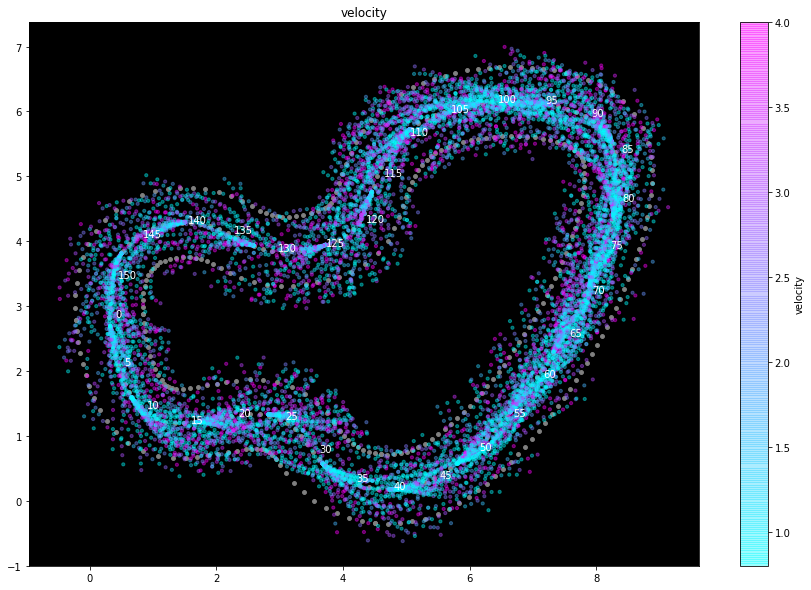

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data2['X'], y = df_data2['Y'], c = df_data2['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

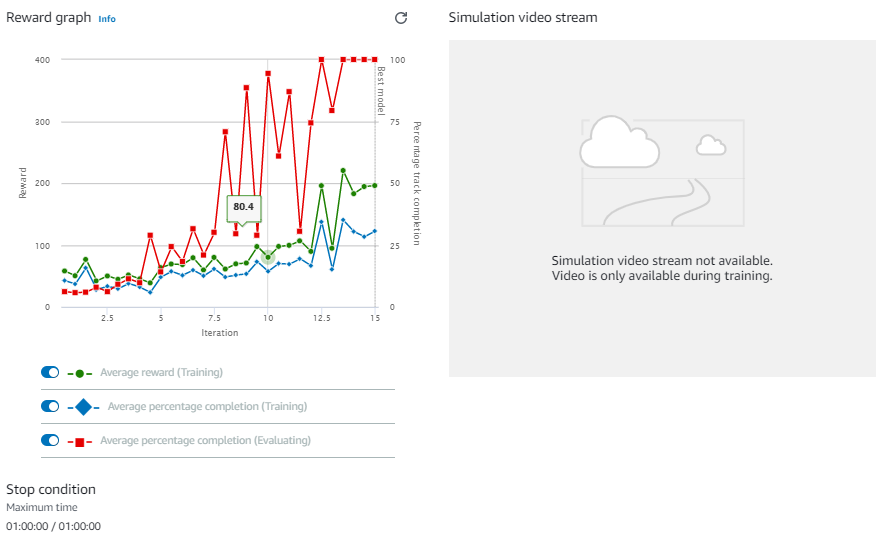



> 그래프 분석

 - UUJIN - 6 모델에 비하여 그래프가 불안정하지만, 확실한 우상향 그래프로, 평가 그래프가 100%를 도달한다.



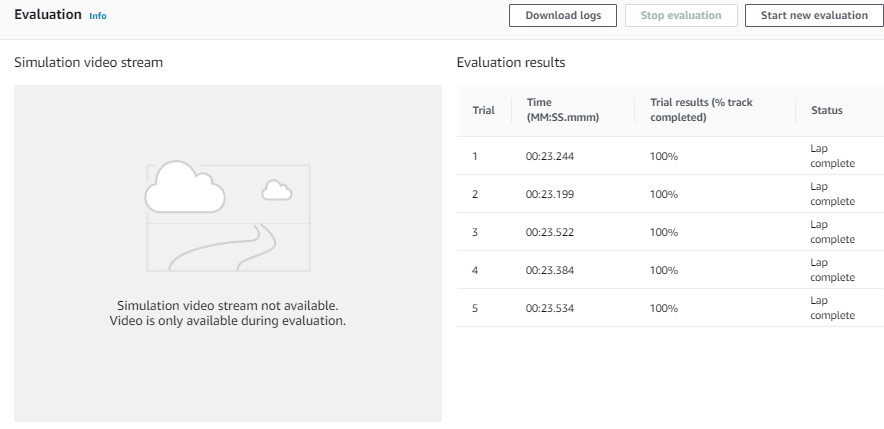

Text(0.5, 1.0, 'throttle')

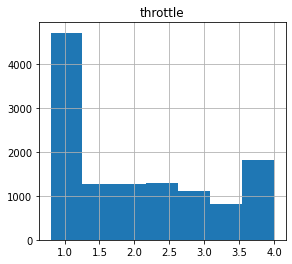

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,3)
df_data2['throttle'].hist(bins = 7)
plt.title('throttle')



> 평가 데이터 분석

  - UUJIN - 6 모델 데이터에서 많은 변동이 있지 않았지만, 기록이 눈에 띄게 좋아진다.

  - 따라서 UUJIN - 8 을 베이스 모델로 클론을 만들어 모델을 발전시키기로 결정했다.



> 개선 방향

 - 학습 영상을 보았을 때, 모험 정도는 충분하다고 판단하여 Entropy 값을 고정하기로 했다.

 - 보상 함수에서 speed 에 따른 보상 향상과 최저 속도 향상을 통해 기록이 좋아지는 것을 확인했다.

 - UUJIN - 8 모델을 기반으로 clone을 생성하고, speed 보상과 최저 속도, 최고 속도를 조절하여 순차적으로 학습해나갈 예정이다.





### C2. 2차 업그레이드 모델 : UUJIN - 8 - clone


> UUJIN - 8 모델을 clone으로 생성하여 최저 속도 수정 및 보상 함수에서 speed 에 따른 보상 수정만을 통해 새로운 모델 생성



In [ ]:
file_names3 = os.listdir(log_path3)

df_file_name3 = pd.DataFrame()
df_file_name3['file_names3'] = file_names3

df_file_name3['iter3'] = pd.Series(file_names3).apply(lambda x : x.split('-')[0]).astype('int')
df_file_name3 = df_file_name3.sort_values(by='iter3').reset_index(drop = True)



data_list3 = []
df_data3 =  pd.DataFrame()
for i, file_names3 in enumerate(df_file_name3['file_names3']) : 
  f3 = open(os.path.join(log_path3, file_names3), mode = 'r') 
  text3 = f3.read()
  f3.close()

  if '[' in text3 :
    text3 = text3.replace('[', '')
    text3 = text3.replace(']','')
    text3 = text3.replace('action', 'action_1, action2')

  text_lines3 = text3.split("\n")
  text_list3 = [text_line3.split(',') for text_line3 in text_lines3]

  df3 = pd.DataFrame(text_list3[1:], columns = text_list3[0])
  df3.dropna(inplace = True)

  float_col3 = df3.columns[~ df3.columns.isin(['episode_status', 'done',	'all_wheels_on_track'])]
  int_col3 = ['episode', 'steps', 'closest_waypoint']
  bool_col3 = ['done',	'all_wheels_on_track']
  df3[float_col3] = df3[float_col3].astype('float')
  df3[int_col3] = df3[int_col3].astype('int')
  df3[bool_col3] = df3[bool_col3].astype('bool')

    # iteration 행 삽입
  new_col3 = df3.columns.insert(0,'iteration')
  df3['iteration'] = i
  df3 = df3[new_col3]

    # 마무리
  data_list3.append(df3)
  df_data3 = df_data3.append(df3)

# 인덱스 정리
df_data3.reset_index(inplace = True, drop = True)

df_data3  

,iteration,episode,steps,X,Y,yaw,steer,throttle,action_1,action2,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1,0.322526,2.691230,-84.002331,-30.000000,1.000000,-30.000000,1.000000,0.000000,True,True,0.606210,1,23.118222,21.847,prepare,0.0
1,0,0,2,0.322497,2.691373,-84.006075,-30.000000,1.295060,-30.000000,1.295060,2.097586,True,True,0.605583,1,23.118222,21.919,in_progress,0.0
2,0,0,3,0.324487,2.680773,-83.798413,0.301992,4.000000,0.301992,4.000000,3.253648,True,True,0.652082,1,23.118222,21.980,in_progress,0.0
3,0,0,4,0.324159,2.658289,-84.370668,16.707176,1.000000,16.707176,1.000000,2.743376,True,True,0.748306,1,23.118222,22.049,in_progress,0.0
4,0,0,5,0.330308,2.620978,-83.927466,-30.000000,1.000000,-30.000000,1.000000,2.073813,True,True,0.911836,1,23.118222,22.117,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,5,59,75,3.344285,0.187381,-81.985228,30.000000,2.147521,30.000000,2.147521,0.797975,True,True,25.743763,32,23.118222,857.169,in_progress,0.0
5167,5,59,76,3.370402,0.086672,-79.522918,15.001673,3.648023,15.001673,3.648023,1.120000,True,True,25.906473,32,23.118222,857.253,in_progress,0.0
5168,5,59,77,3.408705,-0.027404,-75.890635,12.497073,1.000000,12.497073,1.000000,0.670000,True,True,26.291724,33,23.118222,857.310,in_progress,0.0
5169,5,59,78,3.454260,-0.135001,-71.358374,20.075034,1.000000,20.075034,1.000000,0.570000,True,True,26.559831,33,23.118222,857.388,in_progress,0.0


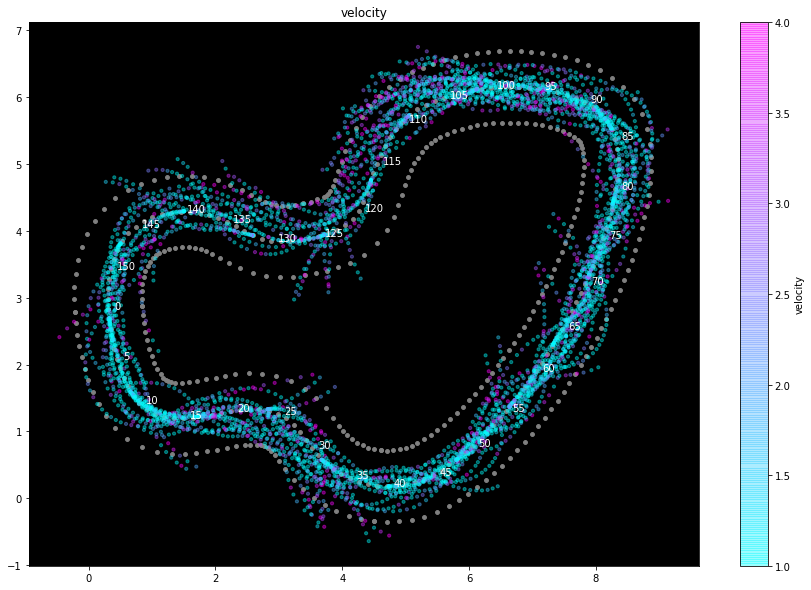

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data3['X'], y = df_data3['Y'], c = df_data3['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

* 각각 다른 3가지 모델의 같은 데이터를 분석하며 학습 시간이 적은 모델일수록 데이터가 적어 해석하기가 힘들다는 것을 알 수 있다.

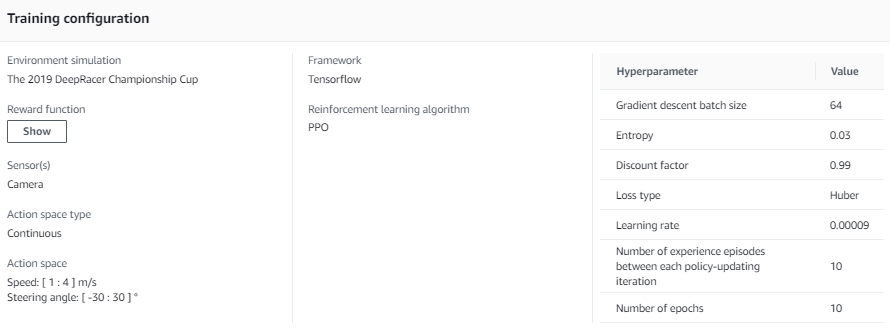



> 하이퍼파라미터 튜닝

1. 최저 속도 : 0.8m/s 에서 1m/s로 수정.

2. 학습 시간 : 1시간에서 30분으로 단축.

 짧게 학습하여 확인 한 후, 필요한 경우 같은 데이터로 추가 학습 예정.





> 보상함수 튜닝

 - reward2에서 speed가 3보다 크거나 같을 때, 더 많은 보상을 주기로 함.





In [ ]:
## reward 2 ##
    speed = params['speed']
    
    if speed >= 3 :
        reward2 = 0.8
    elif speed >= 2 :
        reward2 = 0.5
    elif speed >= 1 :
        reward2 = 0.35
    else :
        reward2 = 0.1

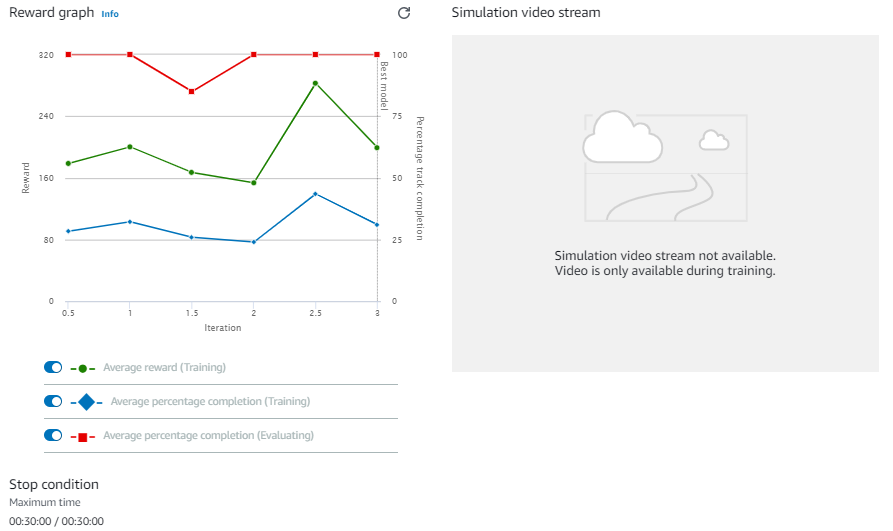



> Reward Graph 해석

안정적으로 학습시켜 놓은 모델 clone에 학습을 시켜, 여전히 안정적인 것을 확인할 수 있다.



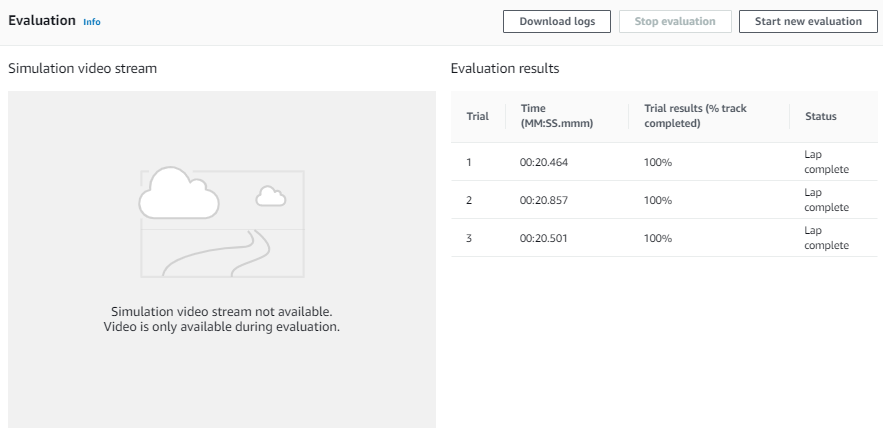



> throttle 데이터를 기반으로 한 Evaluation 해석

 - 보상함수 및 하이퍼파라미터에서 speed에 관련한 데이터를 바꿨기때문에 속도가 빨라져 초가 줄었다고 가정함.

- 그러나 아래 그래프를 통해, 속도로 인해 초가 줄어든 것이 아니라는 것을 알 수 있음.



Text(0.5, 1.0, 'throttle')

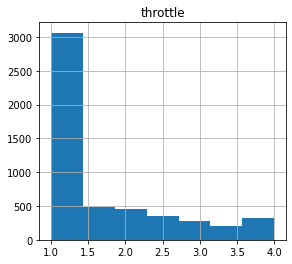

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,3)
df_data3['throttle'].hist(bins = 7)
plt.title('throttle')